In [1]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df['Dataset'].unique()

array([1, 2], dtype=int64)

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'Age':
[65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]


Unique values in 'Gender':
['Female' 'Male']


Unique values in 'Total_Bilirubin':
[ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]


Unique values in 'Direct_Bilirubin':
[ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1. 

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Dataset'] = le.fit_transform(df['Dataset'])

df.head()

#female = 0, male = 1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

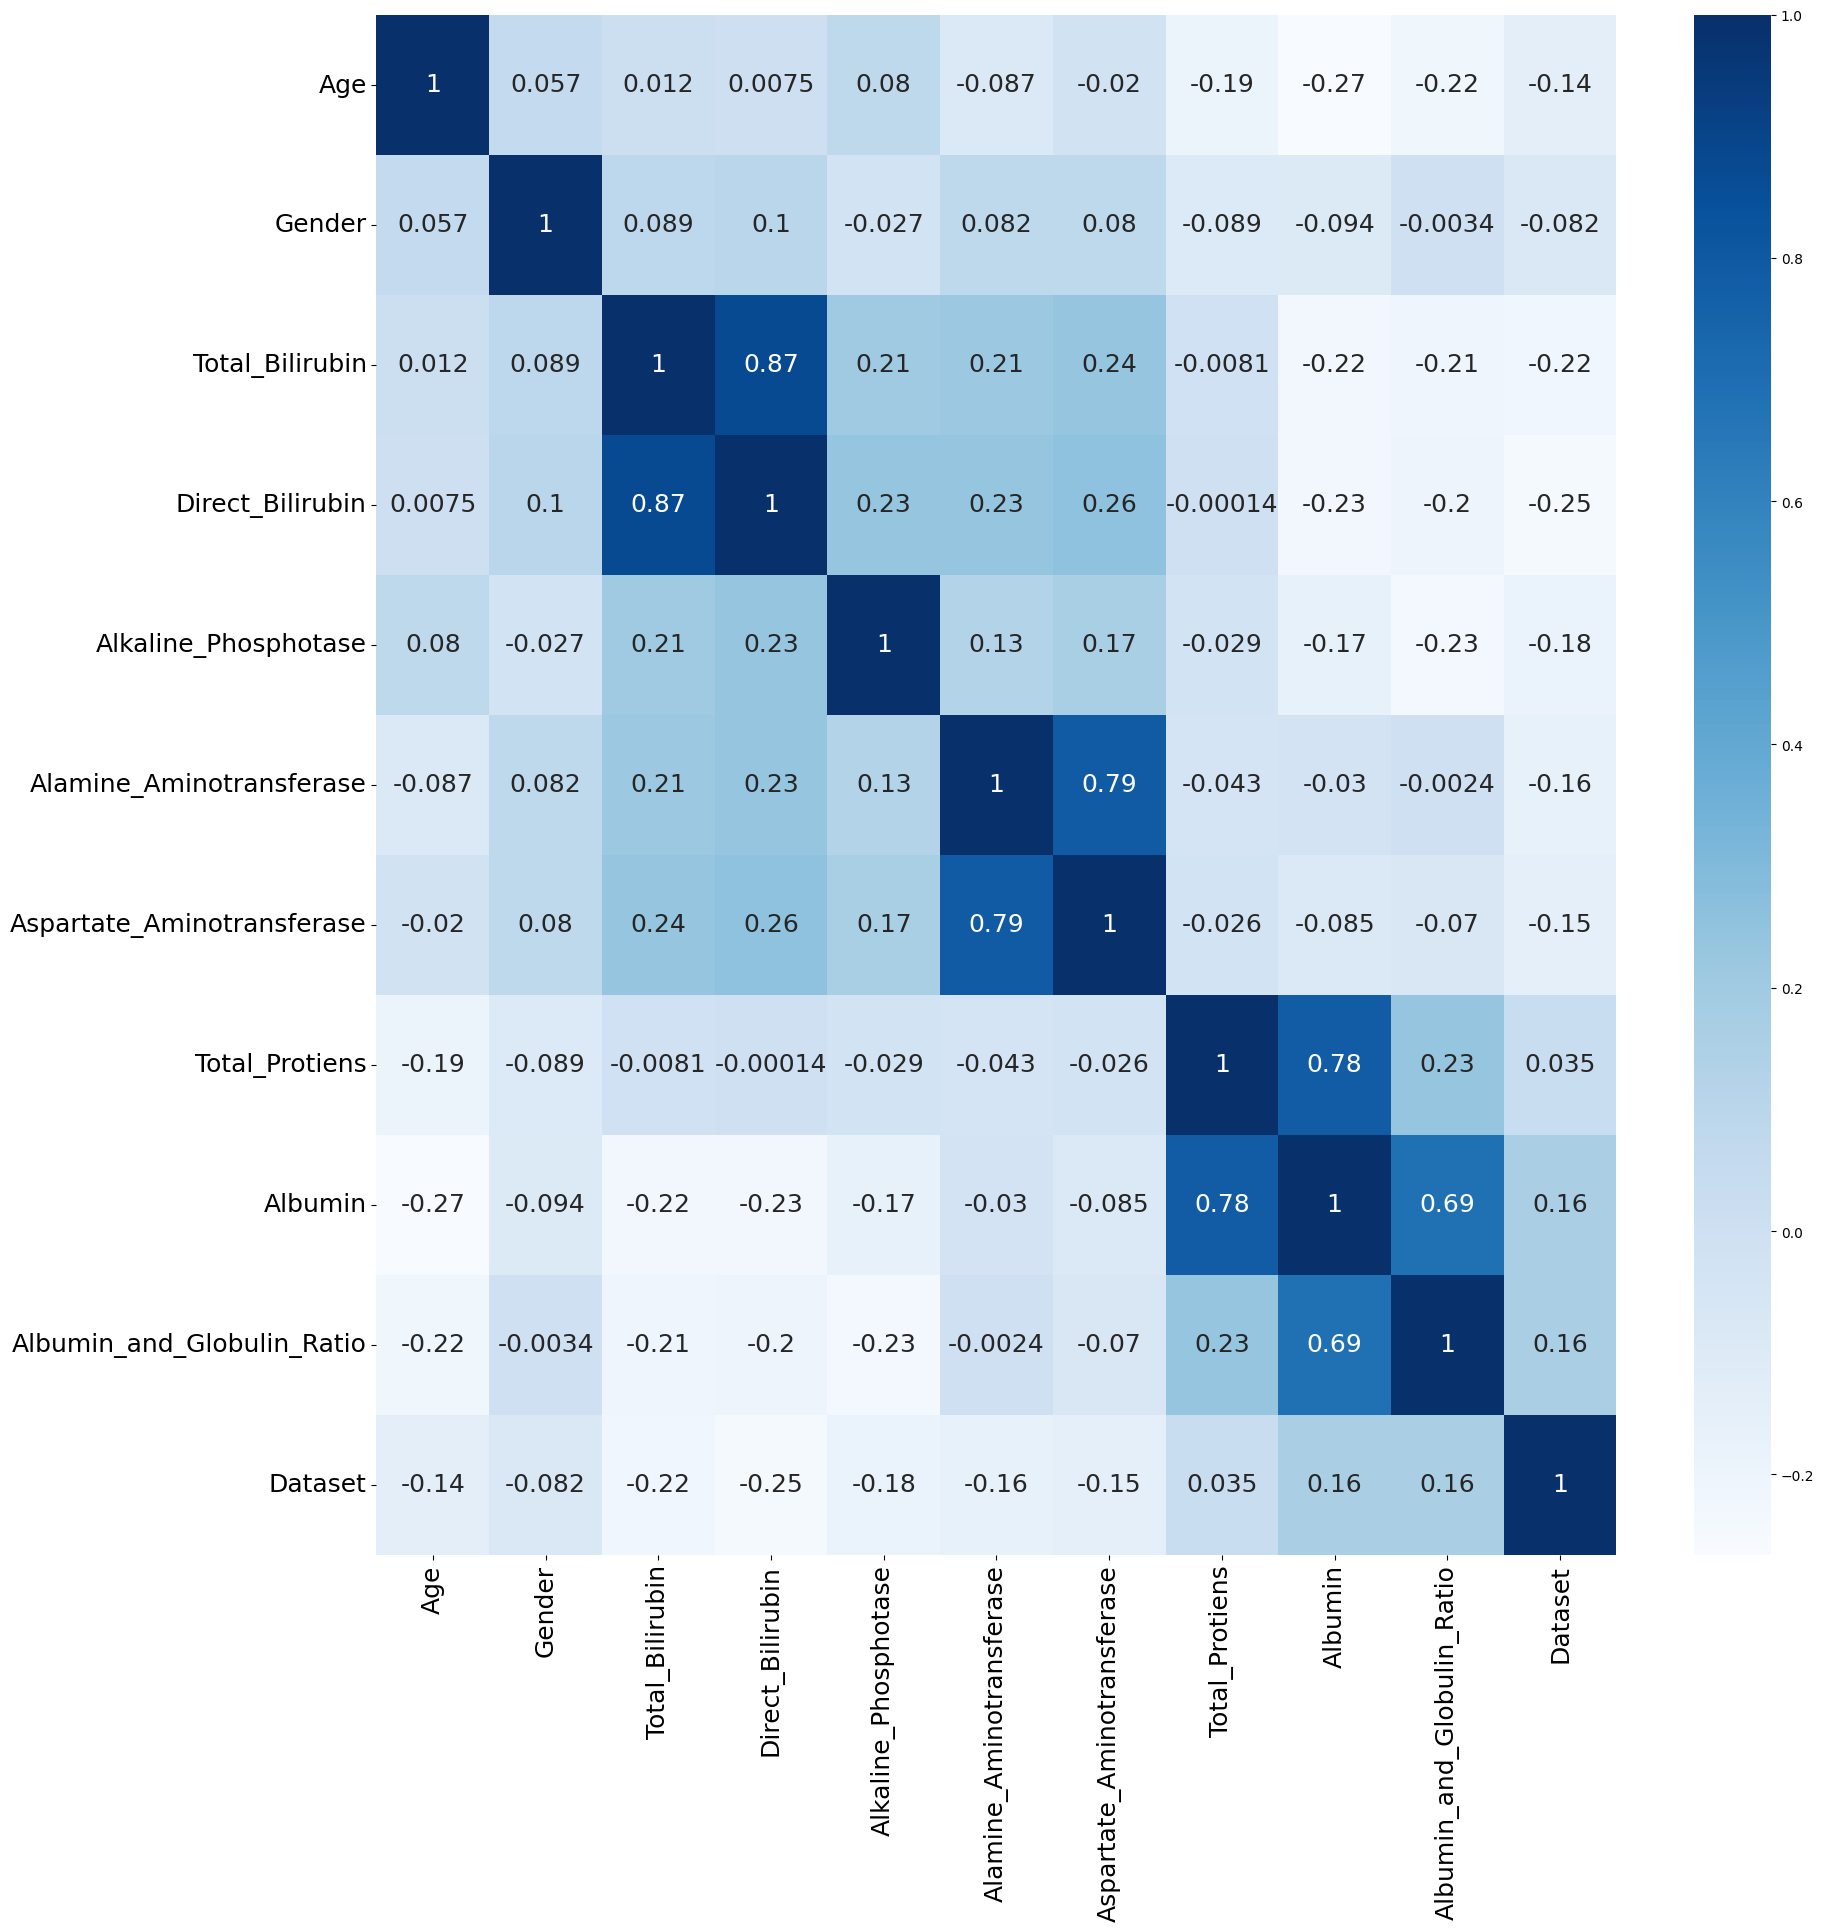

In [10]:
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues', annot_kws={"size": 18})

plt.xticks(fontsize=18)  # Increase x-axis label size
plt.yticks(fontsize=18)  # Increase y-axis label size

plt.savefig("lab3 output/hm.png", dpi=500)
plt.show()


In [11]:
df = df.astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    float64
 1   Gender                      583 non-null    float64
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    float64
 5   Alamine_Aminotransferase    583 non-null    float64
 6   Aspartate_Aminotransferase  583 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    float64
dtypes: float64(11)
memory usage: 50.2 KB


In [12]:
# Convert all columns to numeric, drop rows where conversion fails
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,1.0,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,1.0
579,40.0,1.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,0.0
580,52.0,1.0,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,0.0
581,31.0,1.0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,0.0


In [13]:
X = df.drop(['Dataset'], axis=1)
y = df[['Dataset']]

In [14]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [15]:
print("original", y['Dataset'].value_counts())
print("oversampled",y_resampled['Dataset'].value_counts())

original 0.0    416
1.0    167
Name: Dataset, dtype: int64
oversampled 0.0    416
1.0    416
Name: Dataset, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

Epoch 0/550, Training Loss: Dataset    0.253266
dtype: float64, Train Accuracy: Dataset    0.52
dtype: float64, Validation Loss: Dataset    0.262813
dtype: float64, Validation Accuracy: Dataset    0.429907
dtype: float64
Epoch 30/550, Training Loss: Dataset    0.237434
dtype: float64, Train Accuracy: Dataset    0.553333
dtype: float64, Validation Loss: Dataset    0.246797
dtype: float64, Validation Accuracy: Dataset    0.495327
dtype: float64
Epoch 60/550, Training Loss: Dataset    0.226533
dtype: float64, Train Accuracy: Dataset    0.606667
dtype: float64, Validation Loss: Dataset    0.236183
dtype: float64, Validation Accuracy: Dataset    0.514019
dtype: float64
Epoch 90/550, Training Loss: Dataset    0.22043
dtype: float64, Train Accuracy: Dataset    0.628333
dtype: float64, Validation Loss: Dataset    0.22947
dtype: float64, Validation Accuracy: Dataset    0.542056
dtype: float64
Epoch 120/550, Training Loss: Dataset    0.216677
dtype: float64, Train Accuracy: Dataset    0.666667
d

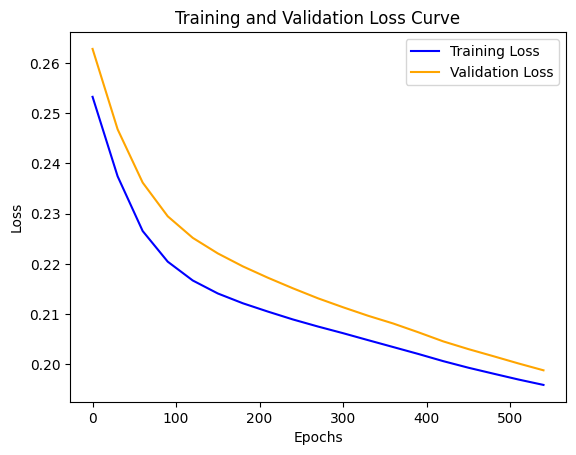

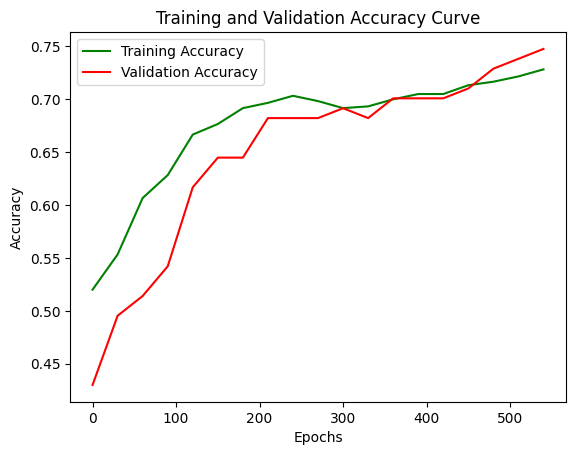

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


class MLP_with_relu:
    def __init__(self, input_dim, hidden_dim, output_dim, seed=None):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        if seed is not None:
            np.random.seed(seed)

        # Initialize weights using Glorot initialization
        self.weights_input_hidden = np.random.randn(self.input_dim, self.hidden_dim) / np.sqrt(self.input_dim)
        self.weights_hidden_output = np.random.randn(self.hidden_dim, self.output_dim) / np.sqrt(self.hidden_dim)
    
    
    
    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)
    
    def predict(self, X):
        # Forward propagation for prediction
        hidden_layer_input = np.dot(X, self.weights_input_hidden)
        hidden_layer_output = self.relu(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output)
        output = 1 / (1 + np.exp(-output_layer_input))

        return output

    def train(self, X_train, y_train, X_val, y_val, epochs=1000, learning_rate=0.001):
        train_loss_history = []  # To store loss values during training
        train_accuracy_history = []  # To store accuracy values during training
        val_loss_history = []  # To store loss values during training
        val_accuracy_history = []  # To store accuracy values during training

        for epoch in range(epochs):
            # Forward propagation with ReLU activation on training data
            hidden_layer_input_train = np.dot(X_train, self.weights_input_hidden)
            hidden_layer_output_train = self.relu(hidden_layer_input_train)

            output_layer_input_train = np.dot(hidden_layer_output_train, self.weights_hidden_output)
            output_train = 1 / (1 + np.exp(-output_layer_input_train))

            # Calculate errors on training data
            output_error_train = y_train - output_train
            hidden_error_train = output_error_train.dot(self.weights_hidden_output.T)

            # Backpropagation
            output_delta_train = learning_rate * output_error_train * output_train * (1 - output_train)
            hidden_delta_train = learning_rate * hidden_error_train * self.relu_derivative(hidden_layer_output_train)

            # Update weights
            self.weights_hidden_output += hidden_layer_output_train.T.dot(output_delta_train)
            self.weights_input_hidden += X_train.T.dot(hidden_delta_train)

                

    
            # Print and store test accuracy and loss
            if epoch % 30 == 0:
                # Calculate errors on training data            
                loss_train = np.mean(np.square(output_error_train))
                train_loss_history.append(loss_train)

                # Calculate errors on validation data
                hidden_layer_input_val = np.dot(X_val, self.weights_input_hidden)
                hidden_layer_output_val = self.relu(hidden_layer_input_val)
                output_layer_input_val = np.dot(hidden_layer_output_val, self.weights_hidden_output)
                output_val = 1 / (1 + np.exp(-output_layer_input_val))
                output_error_val = y_val - output_val
            
                loss_val = np.mean(np.square(output_error_val))
                val_loss_history.append(loss_val)

                # Calculate accuracy on validation data
                predictions_train = self.predict(X_train)
                binary_predictions_train = (predictions_train > 0.5).astype(int)
                accuracy_train = np.mean(binary_predictions_train == y_train)
                train_accuracy_history.append(accuracy_train)
                
                # Calculate accuracy on validation data
                predictions_val = self.predict(X_val)
                binary_predictions_val = (predictions_val > 0.5).astype(int)
                accuracy_val = np.mean(binary_predictions_val == y_val)
                val_accuracy_history.append(accuracy_val)
                print(f"Epoch {epoch}/{epochs}, Training Loss: {loss_train}, Train Accuracy: {accuracy_train}, Validation Loss: {loss_val}, Validation Accuracy: {accuracy_val}")

        return train_accuracy_history, train_loss_history,val_accuracy_history, val_loss_history



# Assuming you have X_test and y_test from train_test_split
input_dim = X_train.shape[1]
hidden_dim = 4
output_dim = 1
threshold = 0.5
mlp = MLP_with_relu(input_dim, hidden_dim, output_dim, seed=4)

# Train the MLP and get the loss and accuracy history
train_accuracy_history, train_loss_history,val_accuracy_history, val_loss_history = mlp.train(X_train, y_train, X_val, y_val, epochs=550, learning_rate=0.0001)


predictions = mlp.predict(X_test)
binary_predictions = np.where(predictions > threshold, 1, 0)
accuracy = accuracy_score(y_test, binary_predictions)

print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Plot the loss curve
# Plotting the loss curves
plt.plot(range(0, len(train_loss_history) * 30, 30), train_loss_history, label='Training Loss', color='blue')
plt.plot(range(0, len(val_loss_history) * 30, 30), val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.savefig("lab3 output/loss.png", dpi=500)
plt.show()

# Plotting the accuracy curves
plt.plot(range(0, len(train_accuracy_history) * 30, 30), train_accuracy_history, label='Training Accuracy', color='green')
plt.plot(range(0, len(val_accuracy_history) * 30, 30), val_accuracy_history, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curve')
plt.legend()
plt.savefig("lab3 output/acc.png", dpi=500)
plt.show()


[[38 23]
 [ 7 57]]


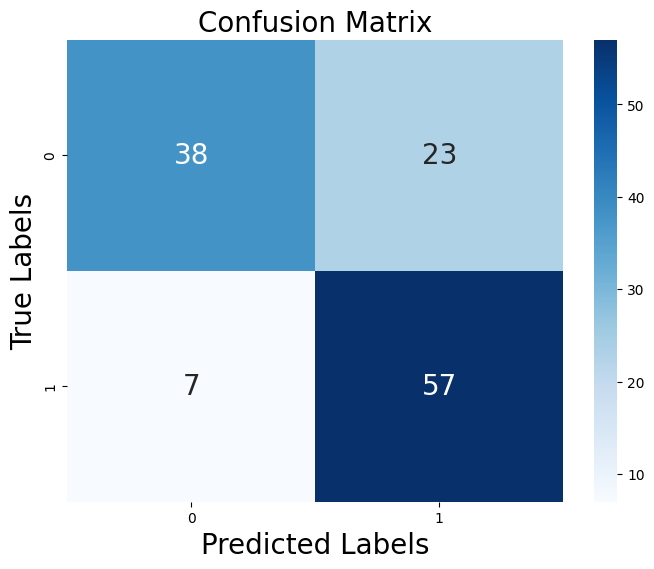

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


conf_matrix = confusion_matrix(y_test, binary_predictions)

# Set the font size
font_size = 20

print(conf_matrix)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': font_size})
# , xticklabels=['1', '2'], yticklabels=['1', '2']

# Set axis labels and title
plt.xlabel('Predicted Labels', fontsize=font_size)
plt.ylabel('True Labels', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size)

plt.savefig("lab3 output/cm.png", dpi=1000)
plt.show()

Epoch 0/550, Training Loss: Dataset    0.262058
dtype: float64, Train Accuracy: Dataset    0.511667
dtype: float64, Validation Loss: Dataset    0.278979
dtype: float64, Validation Accuracy: Dataset    0.448598
dtype: float64
Epoch 30/550, Training Loss: Dataset    0.256893
dtype: float64, Train Accuracy: Dataset    0.511667
dtype: float64, Validation Loss: Dataset    0.272649
dtype: float64, Validation Accuracy: Dataset    0.448598
dtype: float64
Epoch 60/550, Training Loss: Dataset    0.252537
dtype: float64, Train Accuracy: Dataset    0.511667
dtype: float64, Validation Loss: Dataset    0.267211
dtype: float64, Validation Accuracy: Dataset    0.448598
dtype: float64
Epoch 90/550, Training Loss: Dataset    0.248836
dtype: float64, Train Accuracy: Dataset    0.511667
dtype: float64, Validation Loss: Dataset    0.262522
dtype: float64, Validation Accuracy: Dataset    0.448598
dtype: float64
Epoch 120/550, Training Loss: Dataset    0.245654
dtype: float64, Train Accuracy: Dataset    0.51

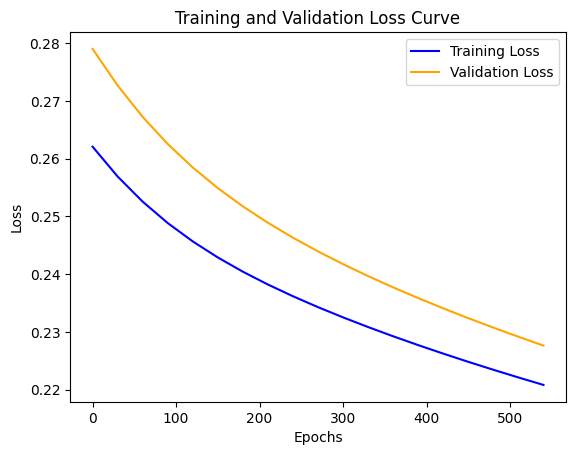

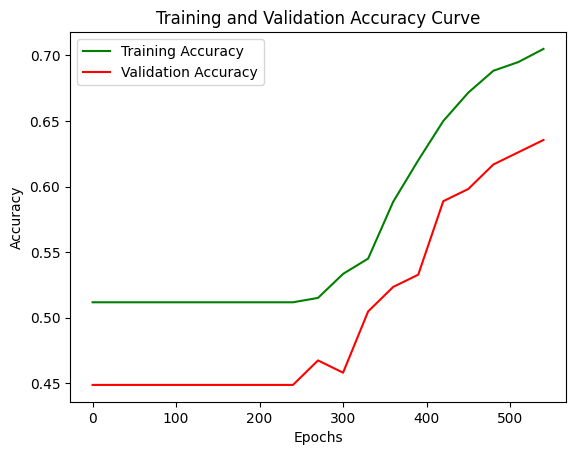

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


class MLP_with_sigmoid:
    def __init__(self, input_dim, hidden_dim, output_dim, seed=None):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        if seed is not None:
            np.random.seed(seed)

        # Initialize weights using Glorot initialization
        self.weights_input_hidden = np.random.randn(self.input_dim, self.hidden_dim) / np.sqrt(self.input_dim)
        self.weights_hidden_output = np.random.randn(self.hidden_dim, self.output_dim) / np.sqrt(self.hidden_dim)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def predict(self, X):
        # Forward propagation for prediction
        hidden_layer_input = np.dot(X, self.weights_input_hidden)
        hidden_layer_output = self.sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output)
        output = self.sigmoid(output_layer_input)

        return output

    def train(self, X_train, y_train, X_val, y_val, epochs=1000, learning_rate=0.001):
        train_loss_history = []  # To store loss values during training
        train_accuracy_history = []  # To store accuracy values during training
        val_loss_history = []  # To store loss values during training
        val_accuracy_history = []  # To store accuracy values during training

        for epoch in range(epochs):
            # Forward propagation with sigmoid activation on training data
            hidden_layer_input_train = np.dot(X_train, self.weights_input_hidden)
            hidden_layer_output_train = self.sigmoid(hidden_layer_input_train)

            output_layer_input_train = np.dot(hidden_layer_output_train, self.weights_hidden_output)
            output_train = self.sigmoid(output_layer_input_train)

            # Calculate errors on training data
            output_error_train = y_train - output_train
            hidden_error_train = output_error_train.dot(self.weights_hidden_output.T)

            # Backpropagation
            output_delta_train = learning_rate * output_error_train * output_train * (1 - output_train)
            hidden_delta_train = learning_rate * hidden_error_train * self.sigmoid_derivative(hidden_layer_output_train)

            # Update weights
            self.weights_hidden_output += hidden_layer_output_train.T.dot(output_delta_train)
            self.weights_input_hidden += X_train.T.dot(hidden_delta_train)

            # Print and store test accuracy and loss
            if epoch % 30 == 0:
                # Calculate errors on training data            
                loss_train = np.mean(np.square(output_error_train))
                train_loss_history.append(loss_train)

                # Calculate errors on validation data
                hidden_layer_input_val = np.dot(X_val, self.weights_input_hidden)
                hidden_layer_output_val = self.sigmoid(hidden_layer_input_val)
                output_layer_input_val = np.dot(hidden_layer_output_val, self.weights_hidden_output)
                output_val = self.sigmoid(output_layer_input_val)
                output_error_val = y_val - output_val
            
                loss_val = np.mean(np.square(output_error_val))
                val_loss_history.append(loss_val)

                # Calculate accuracy on validation data
                predictions_train = self.predict(X_train)
                binary_predictions_train = (predictions_train > 0.5).astype(int)
                accuracy_train = np.mean(binary_predictions_train == y_train)
                train_accuracy_history.append(accuracy_train)
                
                # Calculate accuracy on validation data
                predictions_val = self.predict(X_val)
                binary_predictions_val = (predictions_val > 0.5).astype(int)
                accuracy_val = np.mean(binary_predictions_val == y_val)
                val_accuracy_history.append(accuracy_val)
                print(f"Epoch {epoch}/{epochs}, Training Loss: {loss_train}, Train Accuracy: {accuracy_train}, Validation Loss: {loss_val}, Validation Accuracy: {accuracy_val}")

        return train_accuracy_history, train_loss_history, val_accuracy_history, val_loss_history


# Assuming you have X_test and y_test from train_test_split
input_dim = X_train.shape[1]
hidden_dim = 4
output_dim = 1
threshold = 0.5
mlp = MLP_with_sigmoid(input_dim, hidden_dim, output_dim, seed=4)

# Train the MLP and get the loss and accuracy history
train_accuracy_history, train_loss_history,val_accuracy_history, val_loss_history = mlp.train(X_train, y_train, X_val, y_val, epochs=550, learning_rate=0.0001)


predictions = mlp.predict(X_test)
binary_predictions = np.where(predictions > threshold, 1, 0)
accuracy = accuracy_score(y_test, binary_predictions)

print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Plot the loss curve
# Plotting the loss curves
plt.plot(range(0, len(train_loss_history) * 30, 30), train_loss_history, label='Training Loss', color='blue')
plt.plot(range(0, len(val_loss_history) * 30, 30), val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.plot(range(0, len(train_accuracy_history) * 30, 30), train_accuracy_history, label='Training Accuracy', color='green')
plt.plot(range(0, len(val_accuracy_history) * 30, 30), val_accuracy_history, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curve')
plt.legend()
plt.show()

# predictions

Epoch 0/2000, Training Loss: 0.2514131911903243, Train Accuracy: 0.5, Validation Loss: 0.251294452034712, Validation Accuracy: 0.5
Epoch 30/2000, Training Loss: 0.25016979681521906, Train Accuracy: 0.5, Validation Loss: 0.2501614249479312, Validation Accuracy: 0.5
Epoch 60/2000, Training Loss: 0.2500377876297276, Train Accuracy: 0.5, Validation Loss: 0.250035120681284, Validation Accuracy: 0.5
Epoch 90/2000, Training Loss: 0.24996558436407781, Train Accuracy: 0.5, Validation Loss: 0.24996332410300784, Validation Accuracy: 0.5
Epoch 120/2000, Training Loss: 0.24989950167922076, Train Accuracy: 0.5, Validation Loss: 0.249897347921656, Validation Accuracy: 0.5
Epoch 150/2000, Training Loss: 0.24983583218154115, Train Accuracy: 0.5, Validation Loss: 0.24983373758448685, Validation Accuracy: 0.5
Epoch 180/2000, Training Loss: 0.24977346823391608, Train Accuracy: 0.5, Validation Loss: 0.24977140120322316, Validation Accuracy: 0.5
Epoch 210/2000, Training Loss: 0.24971150959910837, Train Accu

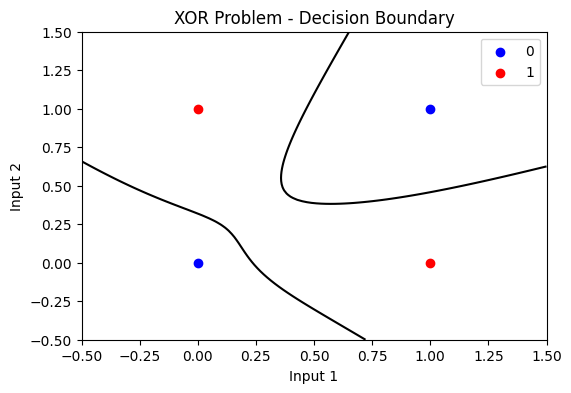

[[-0.5        -0.47979798 -0.45959596 ...  1.45959596  1.47979798
   1.5       ]
 [-0.5        -0.47979798 -0.45959596 ...  1.45959596  1.47979798
   1.5       ]
 [-0.5        -0.47979798 -0.45959596 ...  1.45959596  1.47979798
   1.5       ]
 ...
 [-0.5        -0.47979798 -0.45959596 ...  1.45959596  1.47979798
   1.5       ]
 [-0.5        -0.47979798 -0.45959596 ...  1.45959596  1.47979798
   1.5       ]
 [-0.5        -0.47979798 -0.45959596 ...  1.45959596  1.47979798
   1.5       ]]


In [24]:
# Create XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]]) 

# Initialize the MLP with appropriate dimensions
mlp = MLP_with_sigmoid(input_dim=2, hidden_dim=8
        , output_dim=1, seed=4)

# Train the MLP on the XOR dataset
_,_,_,_ = mlp.train(X, y, X, y, epochs=2000
                    , learning_rate=0.1)

# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], color='blue', label='0')
    plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], color='red', label='1')
    
    # Create a meshgrid for the decision boundary
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, levels=[0.5], colors='black')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('XOR Problem - Decision Boundary')
    plt.legend()
    plt.show()

    print(xx)

# Usage
plot_decision_boundary(mlp, X, y)


In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

mlp.fit(X_train, y_train)

# Make predictions on the test set
predictions = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


Accuracy on the test set: 0.00%


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Define the model architecture
model = Sequential([
    Dense(8, input_dim=10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, verbose=0)

predictions = model.predict(X_test)

predicted_classes = (predictions > 0.5).astype("int32")
accuracy = accuracy_score(y_test, predicted_classes)

print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


4/4 [==============================] - 0s 2ms/step
Accuracy on the test set: 72.80%
